<p style="text-align: center;"><b>DSA312 Data Science with Python</b></p>
<p style="text-align: center;"><b>Author: Jing Rong GOH</b></p>
<p style="text-align: center;"><b>Assignment 1</b></p>
<p style="text-align: center;"><b>Note: This assignment has 10 questions (10 marks each)</b></p>
<p style="text-align: center;"><b>Note: Points may be deducted for overly verbose or inefficient code. Bonus credit will be awarded for concise and elegant solutions.</b></p>

DSA312  G1

Melvin Yong Yulun melvinyong.2021

Caleb Ang Wei-En calebang.2021

Isaac Leong Wen Xuan wxleong.2021

Tan Hao Yang haoyang.tan.2021

Teo Jun Hao junhao.teo.2021

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Q1. Use the diamonds dataset from Seaborn for this question
##### Q1a. Load the diamonds dataset and calculate the correlation between `price` and `carat`. 
##### Q1b. Display a scatter plot to visualize the relationship between `price` and `carat`, with plot title `Price vs Carat of Diamonds`. Describe the plot.
##### Q1c. Create a new column `price_per_carat` to calculate the price per carat for each diamond and display the first 10 rows. What is the `price_per_carat` for the 8th row?
##### Q1d. Visualize the distribution of `price_per_carat` across different `clarity` using a violin plot, with plot title `Price per Carat Distribution by Clarity`. What does the plot tell you about relationship between `price_per_carat` and `clarity`?
##### Q1e. Using plotly.express, create an interactive scatter plot of `price` vs. `carat`, colored by `clarity`, and add hover information to display `cut`. From your plot, what is the `price`, `carat`, `clarity`, and `cut` for the diamond with the 2nd largest `carat` value.

In [27]:
# Q1 Load Libraries Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [23]:
# Q1a
diamonds = sns.load_dataset("diamonds")
diamonds[["price", "carat"]].corr()

# Answer: 0.921591

price     carat
price  1.000000  0.921591
carat  0.921591  1.000000

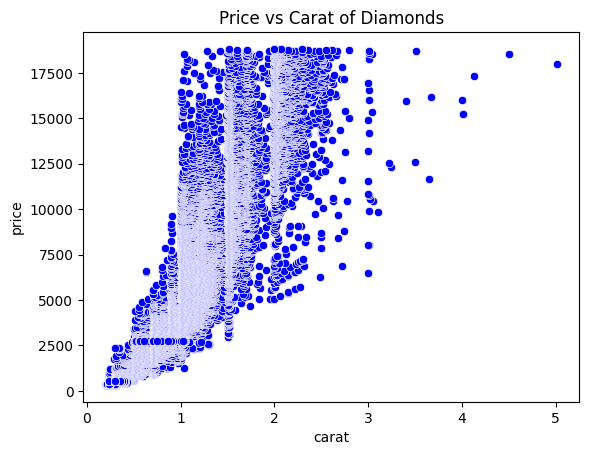

In [24]:
# Q1b
sns.scatterplot(x = "carat", y = "price", data = diamonds, color = "blue")
plt.title("Price vs Carat of Diamonds")
plt.show()

# Answer: The scatter plot illustrates a generally positive relationship between the price and carat of diamonds. 
#However, the relationship becomes significantly weaker for 1 carat diamonds and above. 

In [26]:
# Q1c
diamonds["price_per_carat"] = diamonds["price"]/diamonds["carat"]
diamonds.head(10)

# Answer: 1296.153846

carat        cut color clarity  depth  table  price     x     y     z  \
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47   
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53   
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49   
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39   

   price_per_carat  
0      1417.391304  
1      1552.380952  
2      1421.739130  
3      1151.724138  
4      1080.645161  
5      1400.000000  
6      1400.000000  
7      1296.153846  
8      1531.818182  
9      1469.565217

/var/folders/9r/srl_m58x5bb41c_98jfg0s_r0000gn/T/ipykernel_46810/823920630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "clarity", y = "price_per_carat", data = diamonds, palette = "Blues", inner = "quartile")


<Axes: xlabel='clarity', ylabel='price_per_carat'>

Text(0.5, 1.0, 'Price per Carat Distribution by Clarity')

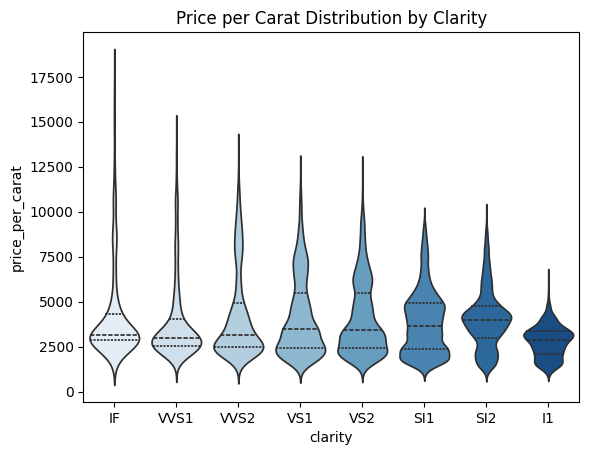

In [59]:
# Q1d
sns.violinplot(x = "clarity", y = "price_per_carat", data = diamonds, palette = "Blues", inner = "quartile")
plt.title("Price per Carat Distribution by Clarity")
plt.show()

# Answer: The variance in price diminishes as clarity goes from IF to I1.

In [28]:
# Q1e
px.scatter(diamonds,            
           x='price', 
           y='carat', 
           color = 'clarity',
           hover_data= 'cut')

# Answer: The second largest carat diamond is a 4.5 carat diamond with a clarity of I1, a fair cut and a price of 18.531K.

### Q2. Use the tips dataset from Seaborn for this question
##### Q2a. Load the tips dataset and run a code that returns the following:
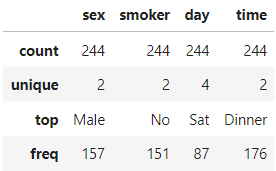

##### Q2b. Create a new feature `meal_time1` that categorizes tips into 'Morning' (when `time` is 'Lunch') or 'Evening' (when `time` is 'Dinner') using `numpy.where()`
##### Q2c. Create a new feature `meal_time2` that categorizes tips into 'Morning' (when `time` is 'Lunch') or 'Evening' (when `time` is 'Dinner') using two `loc[]`
##### Q2d. Between `numpy.where()` and `loc[]`, which approach is generally more efficient?
##### Q2e. Create a new column `tip_percentage` to calculate the `tip` as a percentage of `total_bill`. Use a groupby() to group the data by `time` and `smoker` and calculate the average `tip_percentage` per group. Which group tipped the most / least?

In [8]:
# Q2 Load Libraries Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Q2a
tips = sns.load_dataset("tips")
tips.describe(include = "all").iloc[:4, 2:6]

sex smoker  day    time
count    244    244  244     244
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176

In [10]:
# Q2b
tips["meal_time1"] = np.where(tips["time"] == "Lunch", "Morning", "Evening")


In [11]:
# Q2c
tips["meal_time2"] = None
tips.loc[tips["time"] == "Lunch", "meal_time2"] = "Morning"
tips.loc[tips["time"] == "Dinner", "meal_time2"] = "Evening"

In [12]:
# Q2d

# Answer: numpy.where() is more efficient.

In [13]:
# Q2e.
tips["tip_percentage"] = 100*tips["tip"]/tips["total_bill"]
round(tips.groupby(["time", "smoker"])["tip_percentage"].mean(),2)
# Answer: Lunch smokers tipped the most. Dinner non-smokers tipped the least.

/var/folders/9r/srl_m58x5bb41c_98jfg0s_r0000gn/T/ipykernel_46810/727190144.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(tips.groupby(["time", "smoker"])["tip_percentage"].mean(),2)


time    smoker
Lunch   Yes       17.04
        No        16.09
Dinner  Yes       16.08
        No        15.87
Name: tip_percentage, dtype: float64

### Q3. Use the penguins dataset from Seaborn for this question
##### Q3a. Load the penguins dataset and generate a default profile report using `ydata_profiling`. Use this profile report to answer the remaining questions.
##### Q3b. Check the distribution of `body_mass_g`. Is it normally distributed or skewed? If skewed, is it left-skewed or right-skewed?
##### Q3c. Which two variables exhibit the strongest negative correlation, and what is the value of this correlation? Which section of the profile report did you retrieve this information?
##### Q3d. What is the interquartile range for `bill_depth_mm`?
##### Q3e. Are there any other variable(s) that will always be missing when `bill_lenght_mm` is missing? If yes, which variable(s)? Explain how you arrived at your answer.

In [29]:
# Q3 Load Libraries Here
import seaborn as sns
from ydata_profiling import ProfileReport

In [32]:
# Q3a.
penguins = sns.load_dataset("penguins")
profile = ProfileReport(penguins, title = "Penguins")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
# Q3b.

# Answer: It is slightly skewed to the right.

In [17]:
# Q3c.

# Answer: flipper length (mm) and bill depth (mm) has the strongest negative correlation of -0.523. 
# This is retrieved from the "Correlations" section.

In [18]:
# Q3d.

# Answer: The IQR is 3.1

In [19]:
# Q3e.

# Answer: Yes. They are: bill_depth_mm, flipper_length_mm, body_mass_g. 
#This is retrieved from the heatmap under the "Missing Values" section where the correlation with bill_length_mm is equal to 1.

### Q4. Only `numpy` library can be imported for this question
##### Q4a. First, create a 1D NumPy array of integers from 1 to 100. Then, use the `reshape` method to reshape this array into a 10x10 matrix. Finally, assign the transpose of this matrix to object `transpose_matrix` and display it.
##### Q4b. Replace all even numbers in `transpose_matrix` with 0, and display the updated `transpose_matrix`.
##### Q4c. Extract and display the subarray from the 2nd to 4th row and 3rd to 5th column of the `transpose_matrix`. What is the number at the center of this subarray?
##### Q4d. Create a second matrix of the same shape (i.e. 10x10) filled with random integers between 1 and 100, and assign this matrix to object `matrix2`. Using an appropriate function in numpy, set the seed value to 88 for this question to ensure reproducibility of solution. Display `matrix2`.
##### Q4e. Perform all these calculations in a single line of code: Compute the dot product of `matrix2` and `transpose_matrix` (i.e. `matrix2 ⋅ transpose_matrix`). After obtaining the dot product, calculate the mean of all the values in the resulting matrix. What is the mean value obtained?

In [2]:
# Q4 Load Libraries Here
import numpy as np

In [3]:
# Q4a.
transpose_matrix = np.arange(1,101).reshape((10,10)).transpose()
print(transpose_matrix)

[[  1  11  21  31  41  51  61  71  81  91]
 [  2  12  22  32  42  52  62  72  82  92]
 [  3  13  23  33  43  53  63  73  83  93]
 [  4  14  24  34  44  54  64  74  84  94]
 [  5  15  25  35  45  55  65  75  85  95]
 [  6  16  26  36  46  56  66  76  86  96]
 [  7  17  27  37  47  57  67  77  87  97]
 [  8  18  28  38  48  58  68  78  88  98]
 [  9  19  29  39  49  59  69  79  89  99]
 [ 10  20  30  40  50  60  70  80  90 100]]


In [4]:
# Q4b.
transpose_matrix = np.where(transpose_matrix%2 == 0, 0, transpose_matrix)
print(transpose_matrix)

[[ 1 11 21 31 41 51 61 71 81 91]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 3 13 23 33 43 53 63 73 83 93]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 5 15 25 35 45 55 65 75 85 95]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 7 17 27 37 47 57 67 77 87 97]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 9 19 29 39 49 59 69 79 89 99]
 [ 0  0  0  0  0  0  0  0  0  0]]


In [6]:
# Q4c.
print(transpose_matrix[1:4, 2:5])

# Answer: 33

[[ 0  0  0]
 [23 33 43]
 [ 0  0  0]]


In [8]:
# Q4d.
np.random.seed(88)
matrix2 = np.random.randint(1, 101, size = (10,10))
print(matrix2)

[[ 89  33  80  50  21  63  98  70  49  35]
 [ 98  76   5  72  91  90   8  40  71  11]
 [ 87  30  14 100  78   2  41  79  79  12]
 [ 17  33   6  22   4  95  90  14  48  68]
 [ 47  24  78  52  42  29  64  89  22  29]
 [ 81  39   1  35  76  35  93  86  76  95]
 [ 26  51  62  38  55  66  50  57  87  62]
 [ 79  80  82  28  50   8   5  36  87  93]
 [ 71   7  47  49  84  49  95  78  19  72]
 [ 74  91   7  44  45  94  84  87   7  85]]


In [9]:
# Q4e.
matrix2.dot(transpose_matrix).mean()

# Answer: 13849.6

13849.6

### Q5. Use the tips dataset from Seaborn for this question
##### Q5a. Load the tips dataset into a pandas DataFrame. Filter the DataFrame to include only rows where the `total_bill` is greater than 20. How many rows meet this condition?
##### Q5b. Create a pivot table that shows the sum of `total_bill` for each `day` and `time`. From the pivot table, what is the sum of `total_bill` for `Dinner` on `Sat`?
##### Q5c. Use the `melt()` function to reshape the DataFrame to long format, such that it returns the following:
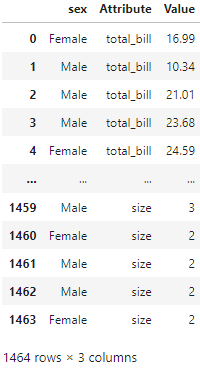
##### Q5d. Sort the DataFrame by `total_bill` in descending order and display the top 10 rows. What is the `total_bill` for the top row and what does it mean?
##### Q5e. What are the sample standard_deviation and population standard_deviation of `total_bill`? 

In [2]:
# Q5 Load Libraries Here
import pandas as pd
import seaborn as sns

In [3]:
# Q5a.
tips = sns.load_dataset("tips")
len(tips[tips["total_bill"]>20])

# Answer: 97

97

In [5]:
tips.pivot_table(index = ["day", "time"], values = "total_bill", aggfunc = "sum")

#Answer: $1778.40

/var/folders/9r/srl_m58x5bb41c_98jfg0s_r0000gn/T/ipykernel_23704/1791219268.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tips.pivot_table(index = ["day", "time"], values = "total_bill", aggfunc = "sum")


total_bill
day  time              
Thur Lunch      1077.55
     Dinner       18.78
Fri  Lunch        89.92
     Dinner      235.96
Sat  Lunch         0.00
     Dinner     1778.40
Sun  Lunch         0.00
     Dinner     1627.16

In [13]:
# Q5c.
tips.melt(id_vars = "sex", 
         var_name = "Attribute",
         value_name = "Value")

sex   Attribute  Value
0     Female  total_bill  16.99
1       Male  total_bill  10.34
2       Male  total_bill  21.01
3       Male  total_bill  23.68
4     Female  total_bill  24.59
...      ...         ...    ...
1459    Male        size      3
1460  Female        size      2
1461    Male        size      2
1462    Male        size      2
1463  Female        size      2

[1464 rows x 3 columns]

In [6]:
# Q5d.
tips.sort_values("total_bill", ascending = False).head(10)
# Answer: The total_bill for the top row is 50.81. This means that the largest total_bill in the dataset was 50.81.

total_bill    tip     sex smoker   day    time  size
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
156       48.17   5.00    Male     No   Sun  Dinner     6
182       45.35   3.50    Male    Yes   Sun  Dinner     3
102       44.30   2.50  Female    Yes   Sat  Dinner     3
197       43.11   5.00  Female    Yes  Thur   Lunch     4
142       41.19   5.00    Male     No  Thur   Lunch     5
184       40.55   3.00    Male    Yes   Sun  Dinner     2
95        40.17   4.73    Male    Yes   Fri  Dinner     4

In [39]:
# Q5e.
print(tips["total_bill"].std())
print(tips["total_bill"].std(ddof = 0))
# Answer: The sample standard deviation is 8.902411954856856 and the population standard deviation is 8.88415057777113

8.902411954856856
8.88415057777113


### Q6. Use the titanic dataset from Seaborn for this question
##### Q6a. Load the titanic dataset into a pandas DataFrame. Split the titanic dataset into two separate DataFrames: `df1` containing columns [`pclass`, `sex`, `age`, `fare`] and `df2` containing columns [`sex`, `embarked`, `class`, `deck`]. Perform an inner merge on the `sex` column to merge `df1` and `df2`, and assign the merged result to `merged_df`. How many rows does `merged_df` contain?
##### Q6b. In a single line of code, utilize two different pandas methods to determine the number of missing values in each column of `merged_df`. Identify the column with the most missing values in `merged_df` and state how many missing values it contains.
##### Q6c. Replace the missing values in the column identified in `Q6b` with the column's most frequent value (mode), and display the resulting DataFrame. What is the column's most frequent value (mode)?
##### Q6d. Filter `merged_df` to display rows where `age` is greater than 30 and `fare` is above 50. How many rows meet these conditions?
##### Q6e. Group `merged_df` by `pclass` and calculate the mean and median of `fare` for each class. Display the results. Based on the output, identify the largest mean value and the smallest median value.

In [1]:
# Q6 Load Libraries Here
import pandas as pd
import seaborn as sns

In [3]:
# Q6a.
titanic = sns.load_dataset("titanic")
df1 = titanic[["pclass", "sex","age", "fare"]]
df2 = titanic[["sex", "embarked", "class", "deck"]]
merged_df = df1.merge(df2, on = "sex", how = "inner")
len(merged_df)

# Answer: 431525 rows.

431525

In [6]:
# Q6b.
merged_df.isnull().sum(); merged_df.isna().sum()

# Answer: deck has the most missing values at 339905.

pclass           0
sex              0
age          88190
fare             0
embarked       628
class            0
deck        339905
dtype: int64

pclass           0
sex              0
age          88190
fare             0
embarked       628
class            0
deck        339905
dtype: int64

In [36]:
# Q6c.
merged_df.fillna({"deck": merged_df["deck"].mode()}, inplace = True)
merged_df["deck"].mode()

# Answer: C

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [36]:
# Q6d.
len(merged_df[(merged_df["age"] > 30) & (merged_df["fare"] > 50)])

# Answer: 36056

pclass     sex   age     fare embarked   class deck
577          1  female  38.0  71.2833        C   First    C
578          1  female  38.0  71.2833        S   Third    C
579          1  female  38.0  71.2833        S   First    C
580          1  female  38.0  71.2833        S   Third    C
581          1  female  38.0  71.2833        C  Second    C
...        ...     ...   ...      ...      ...     ...  ...
426488       1  female  56.0  83.1583        S  Second    C
426489       1  female  56.0  83.1583        S   Third    C
426490       1  female  56.0  83.1583        Q   Third    C
426491       1  female  56.0  83.1583        S   First    B
426492       1  female  56.0  83.1583        S   Third    C

[36056 rows x 7 columns]

In [37]:
# Q6e.
merged_df.groupby(["pclass"])["fare"].agg(["mean", "median"])

# Answer: The largest mean value is 78.718097 and the smallest median value is 8.05

mean  median
pclass                   
1       78.718097   53.10
2       20.358829   13.50
3       13.298541    8.05

### Q7. Use the titanic dataset from Seaborn for this question
##### Q7a. Load the titanic dataset into a pandas DataFrame. Create a Python function `column_sum(df, column_name)` that accepts a DataFrame and a column name as arguments and returns the sum of all values in the specified column. Use this function on the titanic DataFrame to calculate the sum of the `fare` column. What is the resulting value, and what does this value represent?
##### Q7b. Define a Python function `categorize_age(age)` that accepts an age as input and returns a string: `Child` if the age is less than 18, `Adult` if the age is between 18 (inclusive) and 60 (exclusive), and `Senior` if the age is 60 or older. Apply this function to a test input value of 88. What is the output of the function? 
##### Q7c. Create a Python function `count_by_class_and_survived(df, pclass, survived)` that takes a DataFrame, a passenger class (`pclass`), and a survival status (`survived`) as inputs, and returns the count of passengers matching these criteria using control flow statements (`for` loops and `if` statements). (Hint: Utilize the `iterrows()` method in pandas to make your code concise). Apply this function to the titanic DataFrame to determine the total number of survivors in passenger class 2.

In [38]:
# Q7 Load Libraries Here
import pandas as pd
import seaborn as sns

In [39]:
# Q7a.
titanic = sns.load_dataset("titanic")

def column_sum(df, column_name):
    return df[column_name].sum()

column_sum(titanic, "fare")
# Answer: 28693.9493. This value represents the total sum of fares collected for the Titanic.

28693.9493

In [10]:
# Q7b.
def categorize_age(age):
    if age < 18:
        return "Child"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"
    
categorize_age(88)

# Answer: Senior

'Senior'

In [41]:
# Q7c.
def count_by_class_and_survived(df, pclass, survived):
    count = 0
    for index, row in df.iterrows():
        if row["pclass"] == pclass and row ["survived"] == survived:
            count += 1
    return count

count_by_class_and_survived(titanic, 2, 1)

# Answer: There was a total of 87 survivors in Passenger Class 2 in the Titanic shipwreck.

87

### Q8. Use the flights dataset from Seaborn for this question
##### Q8a. Load the flights dataset into a pandas DataFrame. In a single line of code, calculate the total number of passengers for each year and assign the result to a variable named `yearly_passengers`. Display the results. How many passengers were there in the year with the fewest total passengers?
##### Q8b. Create a line plot, with a figure size of (10, 6), showing the total number of passengers for each year. Set the line style to be dashed (--), set the line color to red, set the line width to 2, and use circle markers (o) for the data points.
##### Q8c. Building on your code from Q8b., add a legend to the plot with the label `Total Passengers`. Additionally, include a suitable title and labels for both the x-axis and y-axis.
##### Q8d. Building on your code from Q8c., add annotations to highlight the years with the highest and lowest total passengers on the plot. Use text (`Highest Point`, `Lowest Point`) and blue arrows to point to these data points. (Hint: Utilize the `idxmax()` and `idxmin()` methods in pandas to make your code concise).
##### Q8e. Building on your code from Q8d., enable grid lines on the plot and customize their color to light pink with a dashed (--) style. Change the background color of the plot to `#FFFFE0` (i.e. a light yellow). What observations can you make about the trend depicted in the plot?

In [14]:
# Q8 Load Libraries Here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Q8a.
flights = sns.load_dataset("flights")
yearly_passengers = flights.groupby("year")["passengers"].sum()
yearly_passengers.min()

# Answer:  There were 1520 passengers.

1520

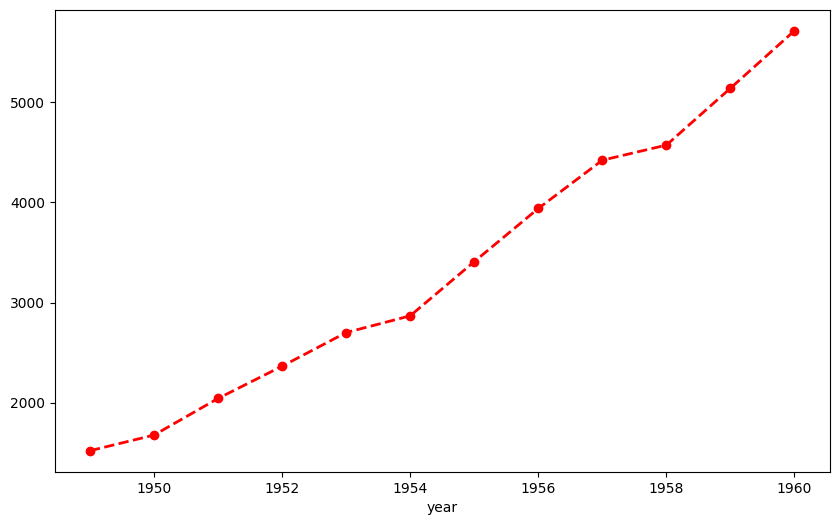

In [16]:
# Q8b.
plt.figure(figsize = (10,6))
ax = yearly_passengers.plot(kind = "line", color = "red", linestyle = "--", lw = 2, marker = "o")
plt.show()

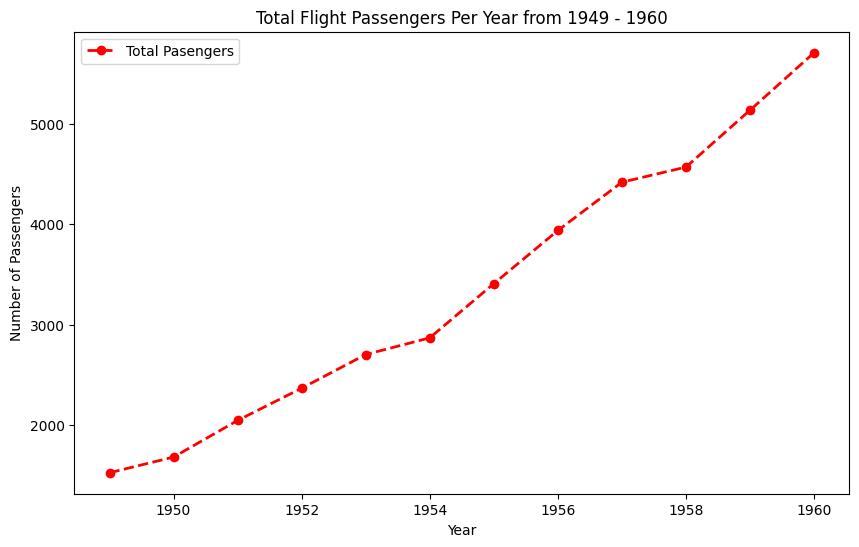

In [17]:
# Q8c.
plt.figure(figsize = (10,6))
ax = yearly_passengers.plot(kind = "line", color = "red", linestyle = "--", lw = 2, marker = "o", label = "Total Pasengers")
ax.legend()
ax.set_title("Total Flight Passengers Per Year from 1949 - 1960")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Passengers")
plt.show()


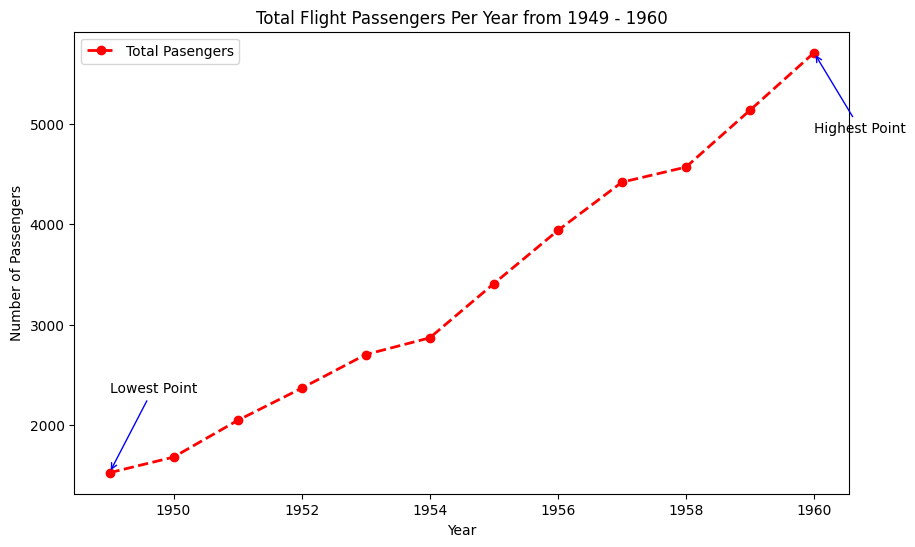

In [18]:
# Q8d.
plt.figure(figsize = (10,6))
ax = yearly_passengers.plot(kind = "line", color = "red", linestyle = "--", lw = 2, marker = "o", label = "Total Pasengers")
ax.legend()
ax.set_title("Total Flight Passengers Per Year from 1949 - 1960")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Passengers")
plt.annotate("Highest Point", 
             xy = (yearly_passengers.idxmax(), yearly_passengers.max()), 
             xytext = (yearly_passengers.idxmax(), yearly_passengers.max() - 800),
            arrowprops = dict(color = "blue", arrowstyle = "->"))
plt.annotate("Lowest Point", 
             xy = (yearly_passengers.idxmin(), yearly_passengers.min()),
            xytext = (yearly_passengers.idxmin(), yearly_passengers.min() + 800),
            arrowprops = dict(color = "blue", arrowstyle = "->"))
plt.show()


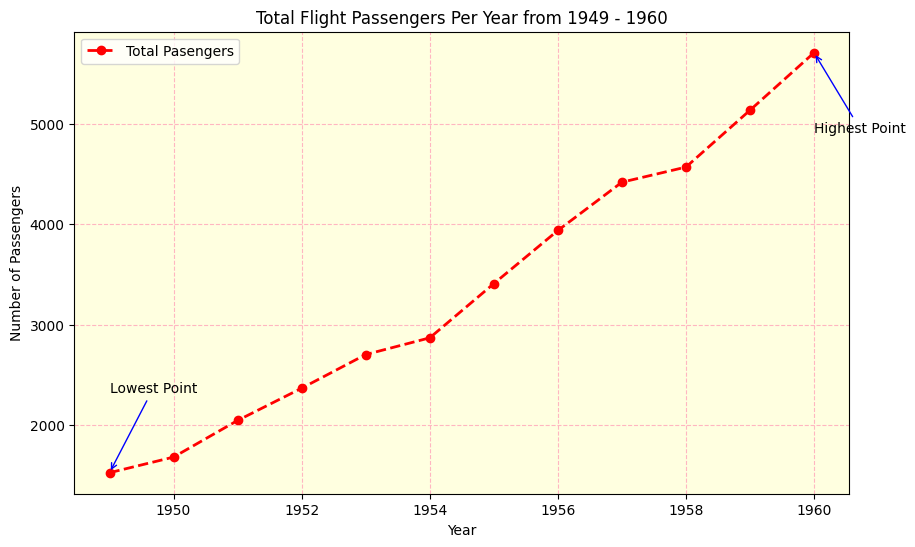

In [19]:
# Q8e.
plt.figure(figsize = (10,6))
ax = yearly_passengers.plot(kind = "line", color = "red", linestyle = "--", lw = 2, marker = "o", label = "Total Pasengers")
ax.legend()
ax.set_title("Total Flight Passengers Per Year from 1949 - 1960")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Passengers")
plt.annotate("Highest Point", 
             xy = (yearly_passengers.idxmax(), yearly_passengers.max()), 
             xytext = (yearly_passengers.idxmax(), yearly_passengers.max() - 800),
            arrowprops = dict(color = "blue", arrowstyle = "->"))
plt.annotate("Lowest Point", 
             xy = (yearly_passengers.idxmin(), yearly_passengers.min()),
            xytext = (yearly_passengers.idxmin(), yearly_passengers.min() + 800),
            arrowprops = dict(color = "blue", arrowstyle = "->"))
ax.grid(color = "lightpink", linestyle = "--")
ax.set_facecolor("#FFFFE0")
plt.show()

### Q9. Use the titanic dataset from Seaborn for this question.
##### Q9a. Load the titanic dataset into a pandas DataFrame. Create a FacetGrid to visualize the `age` distribution across different passenger classes (`pclass`) and survival status (`survived`). Use `sns.histplot` to plot histograms on the FacetGrid, setting the `binwidth` to 5 for a clearer view of the distribution. Set the plot color to black. Apply additional customizations to achieve the desired appearance below:
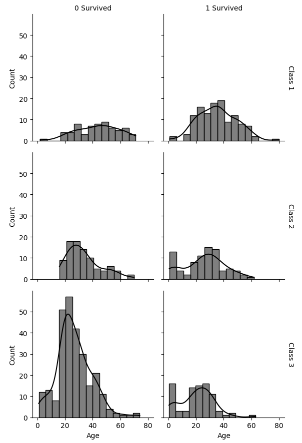 
##### Q9b. What are some observations that you can make from the plot in Q9a?
##### Q9c. Load the titanic dataset into a pandas DataFrame. Create an enhanced violin plot to visualize the distribution of passenger `age` across different passenger classes (`pclass`) and survival statuses (`survived`). Use a figure size of (10,6). Set the palette to `muted`. Apply additional customizations to achieve the desired appearance below:
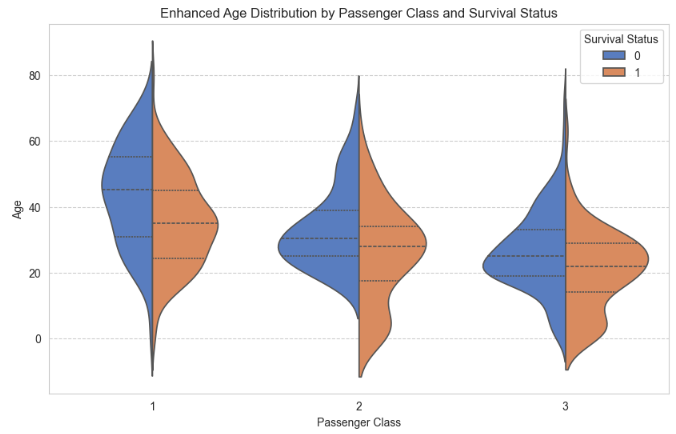
##### Q9d. What are some observations that you can make from the plot in Q9c?

In [48]:
# Q9 Load Libraries Here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

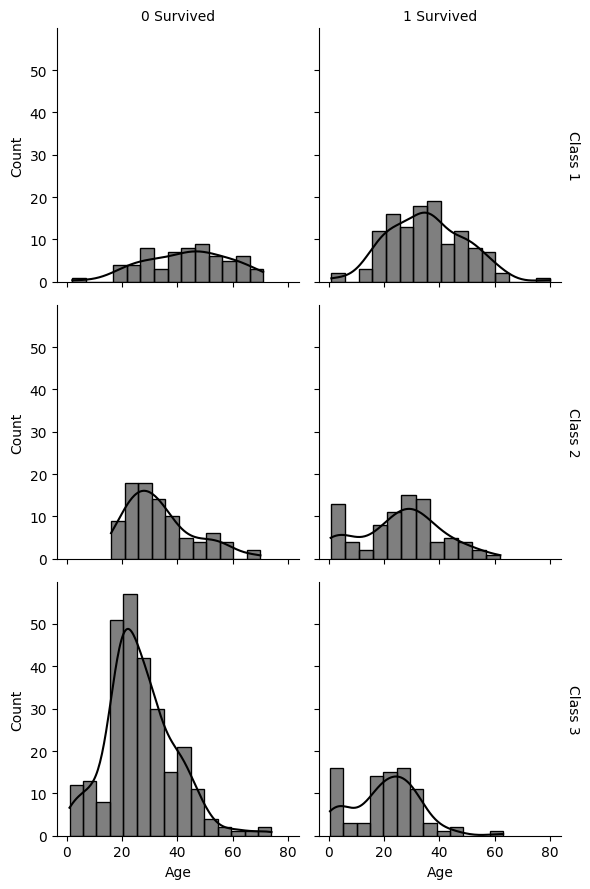

In [20]:
# Q9a.
titanic = sns.load_dataset("titanic")

fg = sns.FacetGrid(titanic, col = "survived", row = "pclass", margin_titles = True)
fg.map(sns.histplot, "age", binwidth = 5, color = "black", kde = True)
fg.set_axis_labels("Age", "Count")
fg.set_titles(row_template = "Class {row_name}", col_template = "{col_name} Survived")
plt.show()

In [50]:
# Q9b.

# Answer: The probability of survival diminishes as we go from Passenger Class 1 to Passenger Class 3.

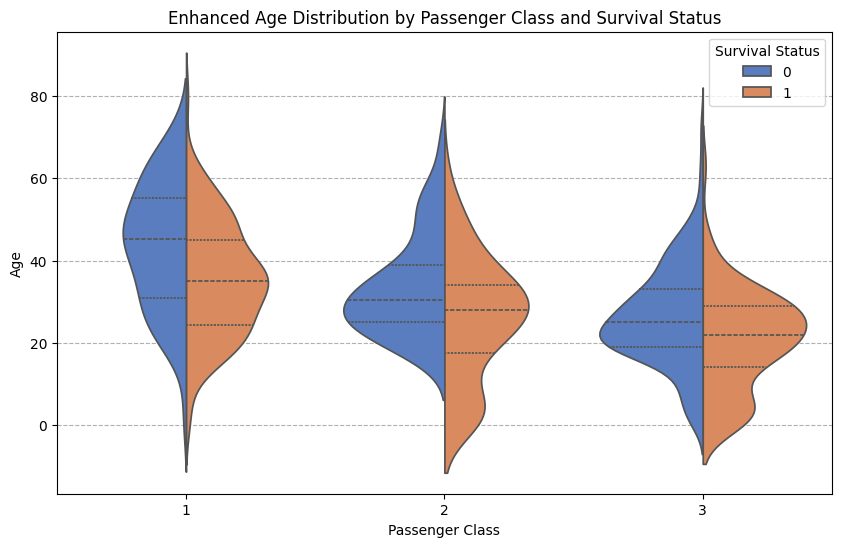

In [21]:
# Q9c.
titanic = sns.load_dataset("titanic")
plt.figure(figsize = (10,6))
ax = sns.violinplot(data = titanic, x = "pclass", y = "age", hue = "survived", 
               palette = "muted", split = True, inner = "quartile")
ax.grid(axis = "y", linestyle = "--")
ax.set_axisbelow(True)
ax.legend(title = "Survival Status")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Age")
ax.set_title("Enhanced Age Distribution by Passenger Class and Survival Status")
plt.show()

In [52]:
# Q9d.

# Answer: Passenger Class 1 appears to have, on average, older passengers compared to Passenger Classes 2 and 3.
#The age distribution of both survivors and non-survivors in Passenger Classes 2 and 3 appear rather similar.

### Q10. Use the iris dataset from Seaborn for this question.
##### Q10a. Load the iris dataset into a pandas DataFrame. Using Plotly Express, create a scatter plot to visualize the relationship of `sepal_width` against `sepal_length` from the iris dataset. Color the data points by species. Add a title `Scatter Plot of Sepal Dimensions by Species` to the plot.
##### Q10b. Based on the interactive plot in Q10a, which species has the longest `sepal_length`, and what is the value of that `sepal_length`? Similarly, which species has the shortest `sepal_width`, and what is the value of that `sepal_width`?

In [53]:
# Q10 Load Libraries Here
import seaborn as sns
import plotly.express as px

In [35]:
# 10a.
iris = sns.load_dataset("iris")
fig = px.scatter(iris, x = "sepal_length", y = "sepal_width", color = "species",
           title = "Scatter Plot of Sepal Dimensions by Species")
fig.show()

In [55]:
# Q10b.

# Answer: Virginica has the longest sepal length of 7.9. Versicolor has the shortest sepal width of 2.